# Homework 4 for ADM, group 23

# Ex.1 Bloom filter + bonus # false positives

In [2]:
i = 0
with open("passwords1.txt") as infile:
    for line in infile:
        i = i+1
print('Number of passwords in passwords1.txt', i)

Number of passwords in passwords1.txt 100000000


In [20]:
i = 0
with open("passwords2.txt") as infile:
    for line in infile:
        i = i+1
print('Number of passwords in passwords2.txt', i)

Number of passwords in passwords2.txt 39000000


In [9]:
ord('a')

97

We choose m(dimension of the future bit array) in respect of a $p =  0.01$ false positive rate that we will pose in the future bloom filter, so the module of the hash functions will the the first greater prime of 958505838.<br>
The calulation for this are that $m = numberofpass*ln(p)/(ln2)^2$ and <br>$k = (m/n)ln2$.<br> From here we need the first prime greater than $m$ to be taken as module to create a series of hashing functions more general possible.

In [14]:
import sympy as s
m = s.nextprime(958505838)
m

958505839

In [3]:
import random
random.randrange(m)

827067896

We will create 4 hash functions, that we will later describe, the first thing we that I need 4 vectors with 20 components, all randomly generated in between 0 and m.

In [4]:
def randomizr(m): 
    vec = []
    for i in range(20):
        vec.append(random.randrange(m))
    return vec


In [6]:
vector1 = randomizr(m)
vector2 = randomizr(m)
vector3 = randomizr(m)
vector4 = randomizr(m)
vector5 = randomizr(m)
vector6 = randomizr(m)
vector7 = randomizr(m)
print(vector1,'\n',vector2, '\n', vector3, '\n', vector4,'\n', vector5, '\n', vector6,'\n',vector7)
#print(vector1 == vector2 or vector1==vector3 or vector1==vector4 or vector2 == vector3 or vector3==vector4)

[238420765, 848925297, 784711979, 497093051, 95554829, 514988376, 892218180, 442524537, 607757090, 700296439, 596878981, 371686624, 439536567, 181541896, 635998009, 830467436, 782561980, 212875567, 392765566, 534916217] 
 [667252919, 294923376, 857674523, 455499217, 487102145, 176035026, 223282253, 610577513, 707981282, 103967431, 812769808, 806736283, 479599574, 228782634, 441223920, 850329407, 434609601, 799716331, 671844433, 589053973] 
 [399089958, 398452767, 51973215, 420884573, 883431994, 46306089, 445136725, 73819833, 460047188, 550915479, 840195322, 53305110, 523616283, 679027420, 164041420, 323692409, 850889656, 267436729, 530084757, 555947052] 
 [360456327, 260340259, 556014589, 88632059, 675905187, 154700660, 558289546, 13412832, 496149736, 145965229, 410734023, 701177977, 523295721, 354015393, 31246611, 203541478, 811770871, 697524858, 38643469, 625709998] 
 [198449539, 858931647, 111900049, 793153272, 72035689, 915892416, 386067109, 432145732, 786680161, 197524167, 5602563

Now that the vectors are all different, to avoid changing them every time we run the file, we save the vectors with the values printed above. We did that to make explicit the uniform distribution to chooes those components.

In [15]:
vector1 = [238420765, 848925297, 784711979, 497093051, 95554829, 514988376, 892218180, 442524537, 607757090, 700296439, 596878981, 371686624, 439536567, 181541896, 635998009, 830467436, 782561980, 212875567, 392765566, 534916217]
vector2 = [667252919, 294923376, 857674523, 455499217, 487102145, 176035026, 223282253, 610577513, 707981282, 103967431, 812769808, 806736283, 479599574, 228782634, 441223920, 850329407, 434609601, 799716331, 671844433, 589053973]
vector3 = [399089958, 398452767, 51973215, 420884573, 883431994, 46306089, 445136725, 73819833, 460047188, 550915479, 840195322, 53305110, 523616283, 679027420, 164041420, 323692409, 850889656, 267436729, 530084757, 555947052]
vector4 = [360456327, 260340259, 556014589, 88632059, 675905187, 154700660, 558289546, 13412832, 496149736, 145965229, 410734023, 701177977, 523295721, 354015393, 31246611, 203541478, 811770871, 697524858, 38643469, 625709998]
vector5 = [198449539, 858931647, 111900049, 793153272, 72035689, 915892416, 386067109, 432145732, 786680161, 197524167, 560256363, 582699524, 801304152, 922568252, 471275982, 287382050, 691678402, 792317068, 475674805, 696631435]
vector6 = [897728679, 185242023, 563247529, 957415683, 275736323, 813059754, 874316063, 81158502, 858981714, 704621876, 782484058, 274547650, 73468298, 285239415, 467534053, 240265981, 85451921, 379450467, 815001741, 153710564]
vector7 = [667091761, 594599526, 417139662, 901299857, 576375979, 19784631, 532685751, 112057141, 475564085, 676246707, 478433915, 854391781, 953972748, 130700365, 732046487, 341923245, 95697728, 164619653, 90474761, 622232906]

In [16]:
def simple_dot(x,y):
    A = 0
    for i in range(20):
        #print(x[i])
        A = A +((x[i])*y[i])%m
    return(A%m)

Now we define the 4 hash fucntions, that will actually be the same but with different coefficients given by the vectors we just defined.

In [17]:
def Hash1(x): 
    vec = []
    for i in x:
        vec.append(ord(i))
    return (simple_dot(vec,vector1))

In [18]:
def Hash2(x): 
    vec = []
    for i in x:
        vec.append(ord(i))
    return (simple_dot(vec,vector2))

In [19]:
def Hash3(x): 
    vec = []
    for i in x:
        vec.append(ord(i))
    return (simple_dot(vec,vector3))

In [20]:
def Hash4(x): 
    vec = []
    for i in x:
        vec.append(ord(i))
    return (simple_dot(vec,vector4))

In [21]:
def Hash5(x): 
    vec = []
    for i in x:
        vec.append(ord(i))
    return (simple_dot(vec,vector5))

In [22]:
def Hash6(x): 
    vec = []
    for i in x:
        vec.append(ord(i))
    return (simple_dot(vec,vector6))

In [23]:
def Hash7(x): 
    vec = []
    for i in x:
        vec.append(ord(i))
    return (simple_dot(vec,vector7))

Now that we have 7 Hash functions we need to build the bloom filter!

In [24]:
import time
def BloomFilter(passwords1, passwords2):
    start = time.time()
    filtr = [0]*m #here m the module
    probably = 0
    ppos = []
    #first i put in my filter all the password from passwords1, signing with a 1 the components where there is something
    with open(passwords1) as infile:
        for line in infile:
            item = line.replace('\n','')
            filtr[Hash1(item)] = 1
            filtr[Hash2(item)] = 1
            filtr[Hash3(item)] = 1
            filtr[Hash4(item)] = 1
            filtr[Hash5(item)] = 1
            filtr[Hash6(item)] = 1
            filtr[Hash7(item)] = 1
    #now that every password from df passwords1 is inside, we have to put the new ones and count homw many are probably duplicates
    with open(passwords2) as infile:
        for line in infile:
            item = line.replace('\n','')
            if filtr[Hash1(item)] == 1:
                if filtr[Hash2(item)] == 1:
                    if filtr[Hash3(item)] == 1:
                        if filtr[Hash4(item)] == 1:
                            if filtr[Hash5(item)] == 1:
                                if filtr[Hash6(item)] == 1:
                                    if filtr[Hash7(item)] == 1:
                                        probably = probably + 1
                                        #we created the ppso list to end the bonus part quickly without rerun the code
                                        ppos.append(item)
    end = time.time()
    #for the probability of false positive we build the model from the passwords1 size and i false positive rate we wanted, so it's 1%
    print('Number of hash function used: ', 7)
    print('Number of duplicates detected: ', probably)
    print('Probability of false positives: ', 0.01)
    print('Execution time: ', end-start)
    return ppos

In [25]:
ppos = BloomFilter('passwords1.txt', 'passwords2.txt')

Number of hash function used:  7
Number of duplicates detected:  14251586
Probability of false positives:  0.01
Execution time:  4877.80882525444


In minutes the execution time is 81.2, but if we hadn't used the ppos list it would have been 78,6 minutes.

## Bonus Part

Now we put all the 100 million password1 in a list, sort them alphabetically with the python sorted() function and execute a binary search to find in a reasonable time the number of real and false positives in our bloom filter for passwords2.txt and check what real false positive rate we achieved!

In [7]:
import csv
Psw = []
with open('passwords1.txt') as infile:
        for line in infile:
            lin = line.replace('\n','')
            Psw.append(lin)

Before being sorted...

In [8]:
print(Psw[0], '\n', Psw[1],'\n', Psw[2])

JV#0$S;D@j+c96/8C(W% 
 J,)e+LH'ENmdV5YGWu4B 
 tR0V2@$SNuU9;<&DafxO


After bein sorted...

In [9]:
Psw = sorted(Psw)
print(Psw[0], '\n', Psw[1],'\n', Psw[2])

!"#$@wYz8=akSeyL&H4% 
 !"#$xCctIO)lT'S<-V+4 
 !"#%GORX+eK)a1Dt>AT8


In [28]:
len(Psw)

100000000

Here the Binary search in a iterative fashion, because the recursive would generally reach the max depth.

In [42]:
#to define the binary i checked on wikipedia, but I already did the algo in my math degree and with Aris.
def binary_s(vec, ln, val):
    L = 0
    R = ln-1
    while L <= R:
        m = ((L + R) // 2)
        if vec[m] < val:
            L = m + 1
        elif vec[m] > val:
            R = m - 1
        else:
            return 1
    return 0

Here the "real thing" of a performed binary search!

In [43]:
import time
start = time.time()
tot = 0
for i in ppos:
    tot = tot + binary_s( Psw, 100000000, i)
end = time.time()
print("The number of passwords really in the dataset was: ", tot)
print('So the number of False Positive in our filter was: ',14251586-tot)
print('Then the rate was actually: ', (14251586-tot)/tot)
print('All this in how many minutes?', (end-start)/60 )

The number of passwords really in the dataset was:  14000000
So the number of False Positive in our filter was:  251586
Then the rate was actually:  0.01797042857142857
All this in how many minutes? 3.305193479855855


We wanted a false positive rate of 0.1, so we can consider yourselves satisfied!!!!

# EX[2]

## Part 1

In [1]:
#import libraries
import pandas as pd
import sys
import string
from collections import Counter

In [2]:
Ask = input('Gimme a string of letters')
letters = list(Ask.lower())
letters

Gimme a string of lettersAAKHVDVkjhdlkhflihve


['a',
 'a',
 'k',
 'h',
 'v',
 'd',
 'v',
 'k',
 'j',
 'h',
 'd',
 'l',
 'k',
 'h',
 'f',
 'l',
 'i',
 'h',
 'v',
 'e']

In [3]:
#I am inspiring myself on the wikipedia page for the algo
def CountingSort(alphabet, lis):
    #first i need the max value and min value of the list, based on the aphabetical dictionary
    max_al = alphabet[lis[0]]
    min_al = alphabet[lis[0]]
    min_l = max_l = 0
    for i in range(len(lis)):
        item = lis[i]
        if alphabet[item] > max_al:
            max_l = item
            max_al = alphabet[max_l]
            
        elif alphabet[item]< min_al:
            min_l = item
            min_al = alphabet[min_l]
            
    #now i take an array of dimension max-min+1
    array = [0]*(max_al - min_al + 2)
    #Here i start counting each value in the list and putting it in the relative component of the array
    for i in lis:
        array[alphabet[i]-min_al+1] = array[alphabet[i]-min_al+1] + 1
        #Now I sum the characters in row
    for i in range(1,len(array)):
        array[i] = array[i]+array[i-1]
    #Now the real counting sort starts!
    k = 0
    new_l = [0]*len(lis)
    for i in range(len(lis)):
            item = alphabet[lis[i]]-min_al +1
            new_l[array[item]-1] = lis[i]
            array[item] = array[item] - 1
    return new_l

In [4]:
alpha_dict = dict(zip(string.ascii_lowercase, range(0,26)))
alphabet_lst = ['a','z','z','h','j','a','h']
Ask = input('Gimme a string of letters')
letters = list(Ask.lower())
CountingSort(alpha_dict, letters)

Gimme a string of lettersAAdksjdlkfhvDGjsg


['a',
 'a',
 'd',
 'd',
 'd',
 'f',
 'g',
 'g',
 'h',
 'j',
 'j',
 'k',
 'k',
 'l',
 's',
 's',
 'v']

## Part 2. Sort a permutated alphabet string and discuss complexity.

In [5]:
import numpy as np
def Permutator(li):
    for i in range(100):
        A = np.random.randint(26)
        B = np.random.randint(26)
        aux = li[A]
        li[A]= li[B]
        li[B] = aux
    return li

Let's take a permutation of the alphabet(remember we use a lowercase alphabet).

In [6]:
ex2 = list(string.ascii_lowercase)
Permutator(ex2)
ex2

['u',
 'g',
 'f',
 'l',
 'd',
 'y',
 'z',
 'x',
 'v',
 'e',
 'r',
 'm',
 'a',
 'k',
 'i',
 'w',
 'p',
 'q',
 'n',
 'o',
 't',
 'c',
 's',
 'b',
 'h',
 'j']

And here is sorted using the CountingSort defined before.

In [7]:
alpha_dict = dict(zip(string.ascii_lowercase, range(0,26)))
CountingSort(alpha_dict, ex2)

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

# Let's discuss the Complexity

The CountingSort is: <br>

    def CountingSort(alphabet, lis):<br>
        max_al = alphabet[lis[0]]  **Complexity O(1)**
        min_al = alphabet[lis[0]]  **Complexity O(1)**
        min_l = max_l = 0          **Complexity O(1)**
        for i in range(len(lis)):  **Complexity O(k) { where k is the len of the input list(in this case 26)**
            item = lis[i]          **Complexity O(1)** 
            if alphabet[item] > max_al:  **Complexity O(1){**
                max_l = item       **Complexity O(1)**
                max_al = alphabet[max_l]  **Complexity O(1)}**   
            elif alphabet[item]< min_al:  **Complexity O(1){**
                min_l = item  **Complexity O(1)**
                min_al = alphabet[min_l]  **Complexity O(1) }}**         
        array = [0]\*(max_al - min_al + 2) **Complexity O(2)**
        for i in lis:  **Complexity O(k)**
            array[alphabet[i]-min_al+1] = array[alphabet[i]-min_al+1] + 1  **Complexity O(1)**
        for i in range(1,len(array)): **Complexity O(c){ where c(max_al - min_al + 2) in this case of alphabet is 27**
            array[i] = array[i]+array[i-1] **Complexity O(1)}** 
        k = 0  **Complexity O(1)**
        new_l = [0]\*len(lis) **Complexity O(k)**
        for i in range(len(lis)):  **Complexity O(k){**
            item = alphabet[lis[i]]-min_al +1  **Complexity O(2)**
            new_l[array[item]-1] = lis[i]  **Complexity O(1)**
            array[item] = array[item] - 1  **Complexity O(1)}**
        return new_l 

So we would like to check that the algorithm respect the CountingSort complexity of $O(k+c)$ where k is the length of the list to order and c the distance between the max and min element + 1.
Let's go!
$f(k, c) = O(1) + O(1)+ O(1) + O(k(O(1)+O(1+2)+O(1+2)) + O(c) + O(k) + O(c) + O(1) + O(k) + O(k4)$ = <br>
$O(k)+O(c)= O(k+c)$.
We can say it's a perfect implemented CountingSort for list of letters.<br>
In this case we can also say it's an ideal scenario, because I have a list with all 26 letters of alphabet and create a vector of 27 components(alwasy one more than the distance between nmax and min), and every component of the vector has 1, so we had created a vector with the sume equal to length -1, this means that the c is the ideal number of component, every other list will have a c that will get a worse quality vector with many 0 when it's created.<br>
For example 'acd' will create intially a vector of [0,1,0,1,1] that is longer than the string, so using a alphabet list with all the letters(one time each or more is the same, it continue gaining performance because we have a little vector with all possible values) is a good case for the performance of the counting sort.

Well you asked empirically.. let's see what we can do, maybe getting a very long string !)

In [8]:
import time
#The same algo but with a timer inside to register performance
def CountingSortEmpirically(alphabet, lis):
    start = time.time()
    #first i need the max value and min value of the list, based on the aphabetical dictionary
    max_al = alphabet[lis[0]]
    min_al = alphabet[lis[0]]
    min_l = max_l = 0
    for i in range(len(lis)):
        item = lis[i]
        if alphabet[item] > max_al:
            max_l = item
            max_al = alphabet[max_l]
            
        elif alphabet[item]< min_al:
            min_l = item
            min_al = alphabet[min_l]
            
    #now i take an array of dimension max-min+1
    array = [0]*(max_al - min_al + 2)
    #Here i start counting each value in the list and putting it in the relative component of the array
    for i in lis:
        array[alphabet[i]-min_al+1] = array[alphabet[i]-min_al+1] + 1
        #Now I sum the characters in row
    for i in range(1,len(array)):
        array[i] = array[i]+array[i-1]
    #Now the real counting sort starts!
    k = 0
    new_l = [0]*len(lis)
    for i in range(len(lis)):
            item = alphabet[lis[i]]-min_al +1
            new_l[array[item]-1] = lis[i]
            array[item] = array[item] - 1
    end = time.time()
    print('Time performance in seconds: ',end-start)
    return new_l

In [9]:
#I remember the algo returns a new list and don't modify the one we want to order

alpha_dict = dict(zip(string.ascii_lowercase, range(0,26)))
CountingSortEmpirically(alpha_dict, ex2)

Time performance in seconds:  0.0


['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

But let's make stuff a lot more evil, let's see with a vector of dimension 25497498 eheheeheheh.

In [10]:
import numpy as np
def PermutatorEvil(li,n):
    for i in range(1938463):
        A = np.random.randint(n)
        B = np.random.randint(n)
        aux = li[A]
        li[A]= li[B]
        li[B] = aux
    return li
ex2 = list(string.ascii_lowercase)*25497498
eheh = PermutatorEvil(ex2, 297498)

In [11]:
alpha_dict = dict(zip(string.ascii_lowercase, range(0,26)))
OilaIcantprint = CountingSortEmpirically(alpha_dict, ex2)

Time performance in seconds:  302.5093297958374


Not bad 5 minutes for a 25 million components vector eh? UUUaahahahah

## Part 3

# EX[3]

# EX[4]

# Bad Points

# Part 1: a distorsion treatment.

First we propose a little study on the distorsion we meet choosing not ideal points.
For example we got a toy dataset (the code used for the kmeans is the strandard sklearn kmeans and we took inspiration from https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c article about how to do kmeans with sklearn).

First let's take the toy set.

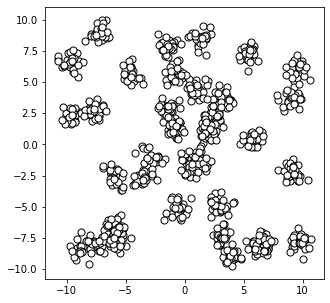

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
#I put 35v centers to make a strange dataset to cluster
# create dataset
X, y = make_blobs(
   n_samples=1000, n_features=2,
   centers=35, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
fig = plt.figure(figsize = (5,5))
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

Now we will print first the distorsion starting from arbitrary centroids for 10 clusters, then using the usual kmeans of sklearn that takes the best on 10 trials.<br>
Note the first number printed will be the distorsion with arbitrary bad points and the second the distorsion with an almost ideal kmeans.

In [14]:
import numpy as np
from sklearn.cluster import KMeans
#Our bad kmeans with bad points
km = KMeans(
    n_clusters=10, init=np.array([[0.2,1],[0.3,1],[0.4,1],[0.5,1],[0.6,1],[0.7,1],[0.8,1],[0.9,1], [0.95,1], [0.1,1]]),
    n_init=1, max_iter=300000, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)
import numpy as np
from sklearn.cluster import KMeans

#A good kmeans with ranodm points and 10 tries
km2 = KMeans(
    n_clusters=10, init= 'random',
    n_init=10000, max_iter=300000, 
    tol=1e-04, random_state=0
)
y2_km = km2.fit_predict(X)

A = km.fit(X)
B = km2.fit(X)
print(A.inertia_, B.inertia_)

5613.937023085697 4531.996922628663


Now the same on 7 clusters!

In [15]:
import numpy as np
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=7, init=np.array([[0.2,1],[0.3,1],[0.4,1],[0.5,1], [0.6,1],[0.7,1],[0.8,1]]),
    n_init=1, max_iter=300000, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)
import numpy as np
from sklearn.cluster import KMeans

km2 = KMeans(
    n_clusters=7, init= 'random',
    n_init=10000, max_iter=300000, 
    tol=1e-04, random_state=0
)
y2_km = km2.fit_predict(X)

A = km.fit(X)
B = km2.fit(X)
print(A.inertia_, B.inertia_)

7817.979996816344 7624.032273740174


And now with 4 centroids.

In [16]:
import numpy as np
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=4, init=np.array([[0.2,1],[0.3,1],[0.4,1],[0.5,1]]),
    n_init=1, max_iter=300000, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)
import numpy as np
from sklearn.cluster import KMeans

km2 = KMeans(
    n_clusters=4, init= 'random',
    n_init=10000, max_iter=300000, 
    tol=1e-04, random_state=0
)
y2_km = km2.fit_predict(X)

A = km.fit(X)
B = km2.fit(X)
print(A.inertia_, B.inertia_)

21937.454688076607 15952.976178703893


The distorsions changed a lot but actually we will point out that where all kinda similar in the ranges we expected, we can check it with the elbow method.

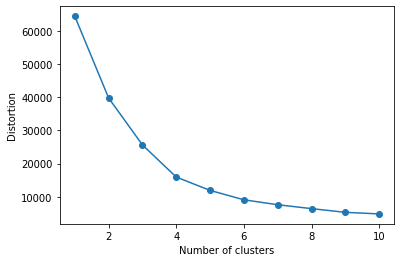

In [17]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Finally we saw that bad initialization got in vary cases a very worse distiorsion, so the cost of the kmeans would grow more arbitrarly choosing bad points that will augment the distorsion and so the loops to get to a good acceptable result.

# Part 2: Careful we got into an infinite loop!

Well we managed to make crash the algorithm with bad initialization. How?

We selected points out of max and min of the dataset so we usually got that some centroids will have no item associated, so when comparing the minimum distance the algorithm will return a cluster with the nan values as distances ( as the minimum in a vector with numbers and nan is a nan), so by this procedure the algo will just get stuck in a infinite loop that will exchange the clusters eevry time without returning anything. We tought this was a good example of bad initialization because the algo takes random centroids, and with the following code the cost will explode and the algo will not give anything if not provided of method of solution(like selecting new centers when some centroids become nan).

### We create a perfect dataframe and initialize far centroids to create a "difficult" situation for k-means (the following code is a different kmeans than in ex3, the same in practice but we wanted to show how two people in teh same group got similar but different kmeans).

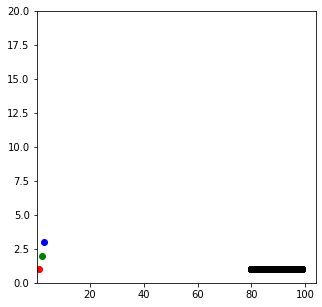

{1: [1, 1], 2: [2, 2], 3: [3, 3]}


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
%matplotlib inline

# List of channels we want to access

df = pd.DataFrame() 
c=[]
for i in range(2):
    cc=[]
    for j in range(100):
        a=0
        if i==1:
            a=1
        else:
            a=np.random.randint(80,100)
        cc.append(a)
    c.append(cc)

df = pd.DataFrame({'f1':c[0], 'f2':c[1],})# 'f3':c[2],'f4':c[3], 'f5':c[4], 'f6':c[5]})
df
k = 3

#centroids = {
   # i+1:[np.random.uniform(0,1000), np.random.uniform(19,20)] for i in range(k)
#}
centroids = {1:[1,1], 2:[2,2], 3:[3,3]}#,4:[4,4]}
fig = plt.figure(figsize = (5,5))
plt.scatter(df['f1'], df['f2'], color = 'k')
colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
for i in centroids:
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(0.1000)
plt.ylim(0,20)
plt.show()
print(centroids)

## Now it's time to move centroids and generate clusters.... if k-means is able!(Let's crash some codes baby)

{1: [nan, nan], 2: [nan, nan], 3: [89.64, 1.0]}


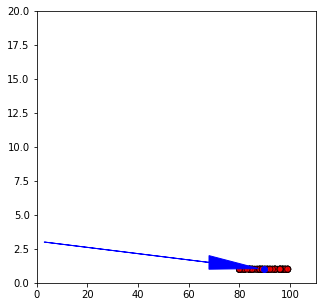

{1: [89.64, 1.0], 2: [nan, nan], 3: [nan, nan]}


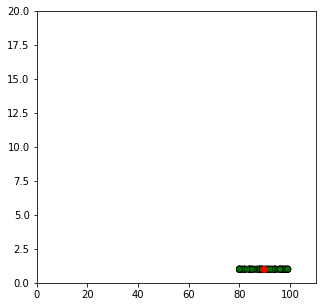

{1: [nan, nan], 2: [89.64, 1.0], 3: [nan, nan]}


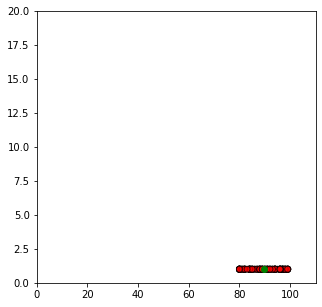

{1: [89.64, 1.0], 2: [nan, nan], 3: [nan, nan]}


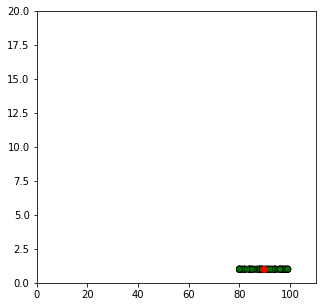

{1: [nan, nan], 2: [89.64, 1.0], 3: [nan, nan]}


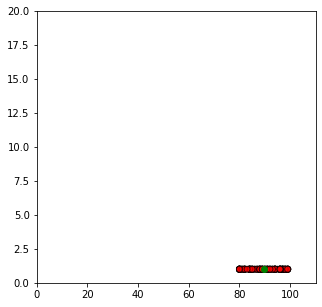

{1: [89.64, 1.0], 2: [nan, nan], 3: [nan, nan]}


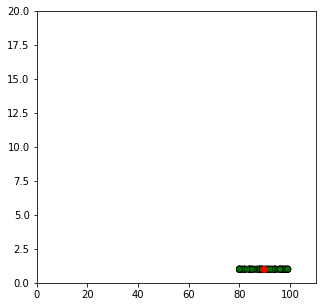

{1: [nan, nan], 2: [89.64, 1.0], 3: [nan, nan]}


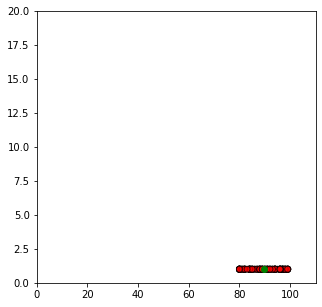

{1: [89.64, 1.0], 2: [nan, nan], 3: [nan, nan]}


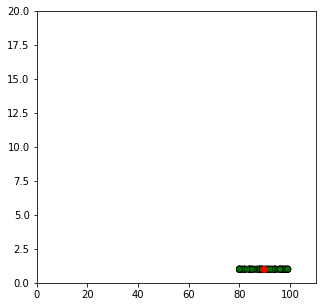

{1: [nan, nan], 2: [89.64, 1.0], 3: [nan, nan]}


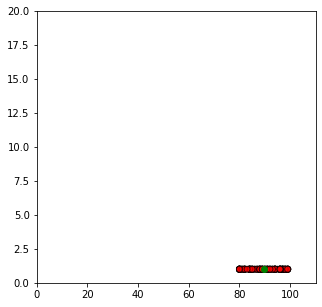

{1: [89.64, 1.0], 2: [nan, nan], 3: [nan, nan]}


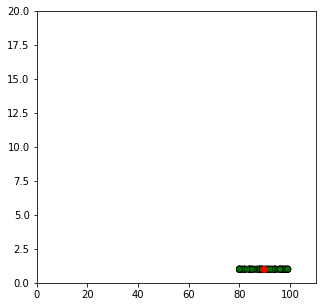

{1: [nan, nan], 2: [89.64, 1.0], 3: [nan, nan]}


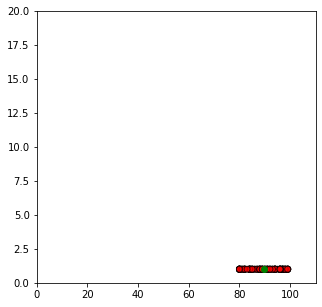

{1: [89.64, 1.0], 2: [nan, nan], 3: [nan, nan]}


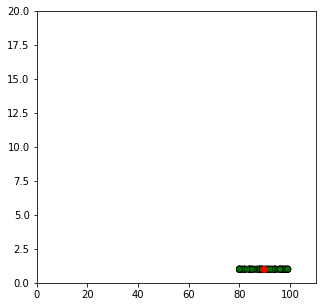

{1: [nan, nan], 2: [89.64, 1.0], 3: [nan, nan]}


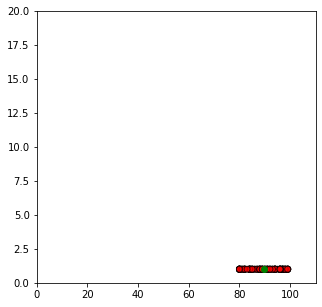

{1: [89.64, 1.0], 2: [nan, nan], 3: [nan, nan]}


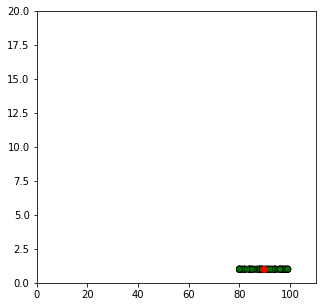

{1: [nan, nan], 2: [89.64, 1.0], 3: [nan, nan]}


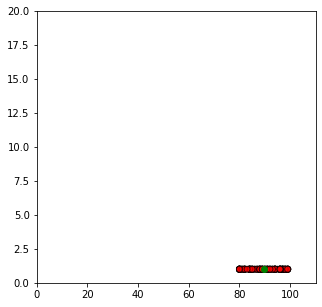

{1: [89.64, 1.0], 2: [nan, nan], 3: [nan, nan]}


KeyboardInterrupt: 

<Figure size 360x360 with 0 Axes>

In [19]:
def euclid(df, centroids):
    klust = []
    for i in range(len(df)):
        ds = []
        for h in range(1,k+1):
            dist = 0
            for j in range(2):
                #print(dist)
                if(centroids[h][j] == 'nan' ):
                    print('PORCAPUPAZZA')
                dist = dist + (df.loc[i][j]-centroids[h][j])**2
            dist = np.sqrt(dist)
            ds.append(dist)
            #if here we use nanargmin the code won't crash but it will give just 1 cluster and 3 empty clusters and this is not what we want!
        klust.append(np.argmin(ds) + 1)
    df['clusters'] = klust
    df['color'] = df['clusters'].map(lambda x: colmap[x])
    return df
#put the first clusters
df = euclid(df, centroids)
df.head()

def new_centroids(df, centr, k):
    names = ['f1', 'f2']
    for i in range(1,k+1):
        for j in range(2):
            centr[i][j] = np.mean(df[df['clusters']==i][names[j]])
    return centr


#o = 0
while True:
    closest_centroids = df['clusters'].copy(deep=True)
    old_centroids = copy.deepcopy(centroids)
    centroids = new_centroids(df, centroids, k)
    df = euclid(df, centroids)
    print(centroids)
    if closest_centroids.equals(df['clusters']):
        print('yeeeeeee')
        break   
    fig = plt.figure(figsize = (5,5))
    ax = plt.axes()
    colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
    plt.scatter(df['f1'], df['f2'], alpha = 0.7, color = df['color'], edgecolor = 'k')
    for i in centroids:
        plt.scatter(*centroids[i], color = colmap[i])
    plt.xlim(0,110)
    plt.ylim(0,20)
    old = []
    for i in old_centroids.keys():
        l = []
        for j in range(0,2):
            l.append(old_centroids[i][j])
        old.append(l)
        dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
        dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
        ax.arrow(old[i-1][0], old[i-1][1], dx, dy, head_width=1, head_length=np.sqrt(dx**2+dy**2)*0.3, fc=colmap[i], ec=colmap[i])
    plt.show()